In [ ]:
import numpy as np
import scipy.special as sp
from scipy.special import sph_harm
import matplotlib.pyplot as plt

# Define the function to evaluate the radial wavefunction
def eval_radial_wavefunction(n, l, r_values, a_0=1):
    rho_values = 2 * r_values / (n * a_0)
    k = n - l - 1
    # Evaluate the associated Laguerre polynomial
    L_values = sp.genlaguerre(k, 2 * l + 1)(rho_values)
    # Evaluate the full radial wavefunction
    R_values = np.sqrt((2 / (n * a_0))**3 * np.math.factorial(k) / (2 * n * np.math.factorial(k + 2 * l + 1))) * np.exp(-rho_values / 2) * rho_values**l * L_values
    return R_values

# Define the function to compute the angular part using spherical harmonics
def eval_angular_wavefunction(l, m, theta, phi):
    Y_lm_value = sph_harm(m, l, theta, phi)
    #print(Y_lm_value)
    return Y_lm_value

# Define the function to compute the full wavefunction by combining the radial and angular parts
def compute_full_wavefunction(n, l, m, r, theta, phi, a_0=1):
    # Compute the radial part
    R_value = eval_radial_wavefunction(n, l, np.array([r]), a_0)[0]
    
    # Compute the angular part
    Y_lm_value = eval_angular_wavefunction(l, m, theta, phi)
    
    # Compute the full wavefunction
    psi_value = R_value * Y_lm_value
    return psi_value

# Define the function to compute the probability density from the wavefunction
def get_prob_density(psi_value):
    return np.abs(psi_value)**2

# Create a Cartesian grid for x and y at z = 0
x_values = np.linspace(-10, 10, 200)
y_values = np.linspace(-10, 10, 200)
z_values = np.linspace(-10,10,200)
x_grid, y_grid, z_grid = np.meshgrid(x_values, y_values, z_values, indexing='ij')

# Convert Cartesian coordinates to spherical coordinates
r_grid = np.sqrt(x_grid**2 + y_grid**2 + z_grid**2 )
theta_grid = np.arccos(z_grid / r_grid)  # theta is pi/2 in the xy plane
phi_grid = np.arctan2(y_grid, x_grid)

def plot_probability_density_3d(n, l, m):
    # Compute the probability density for each point on the grid
    prob_density_grid = np.zeros_like(r_grid, dtype=float)
    for i in range(x_grid.shape[0]):
        for j in range(x_grid.shape[1]):
            for k in range(x_grid.shape[2]):
                r = r_grid[i, j, k]
                theta = theta_grid[i, j, k]
                phi = phi_grid[i, j, k]
                psi_value = compute_full_wavefunction(n, l, m, r, theta, phi)
                prob_density_grid[i, j, k] = get_prob_density(psi_value)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
     # Normalize probability density for color mapping
    prob_density_normalized = (prob_density_grid - np.min(prob_density_grid)) / (np.max(prob_density_grid) - np.min(prob_density_grid))

        # Plot points where probability density is above a certain threshold to reduce plot size
    threshold = np.percentile(prob_density_normalized, 99)
    mask = prob_density_normalized > threshold
    ax.scatter(x_grid[mask], y_grid[mask], z_grid[mask], c=prob_density_normalized[mask], cmap='inferno', marker='o', s=1, alpha=0.6)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(f'Probability Density |ψ|^2 for n={n}, l={l}, m={m}')
    plt.show()

# Generate 3D plots for all selections of n, l, m for n = 1, 2, 3, 4, 5
for n in range(1, 2):
    for l in range(n):
        for m in range(-l, l + 1):
            plot_probability_density_3d(n, l, m)


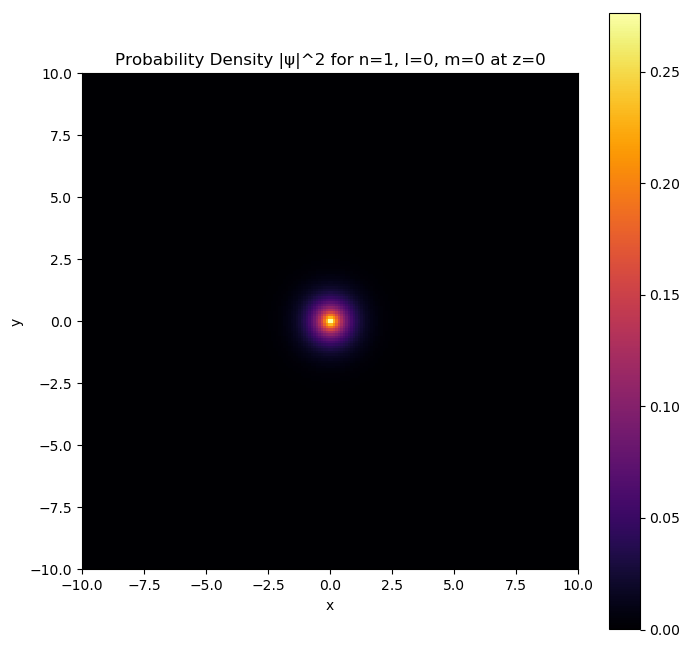

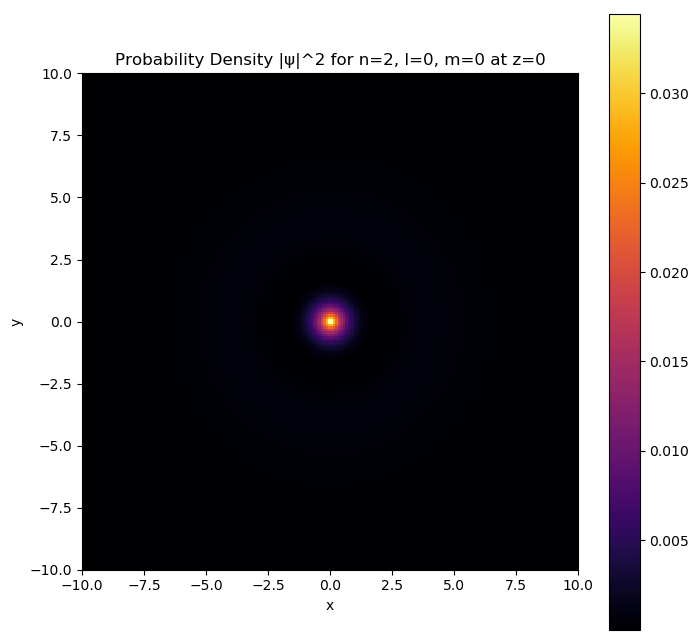

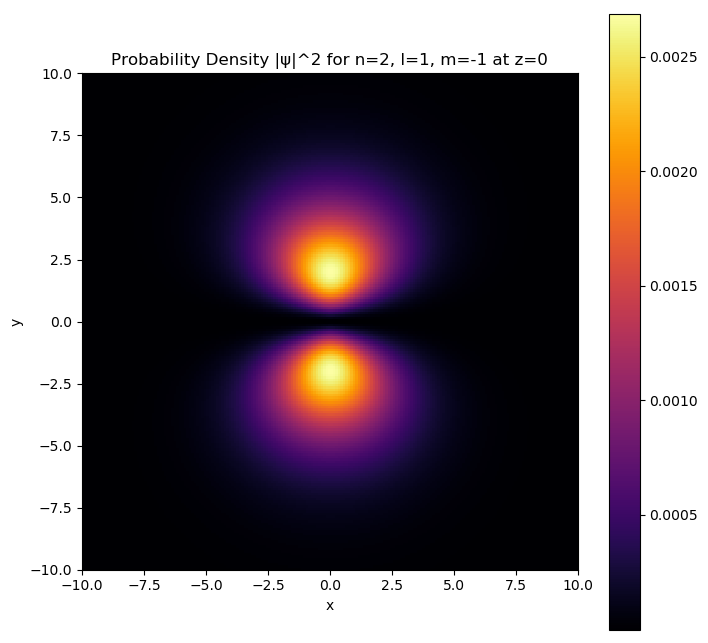

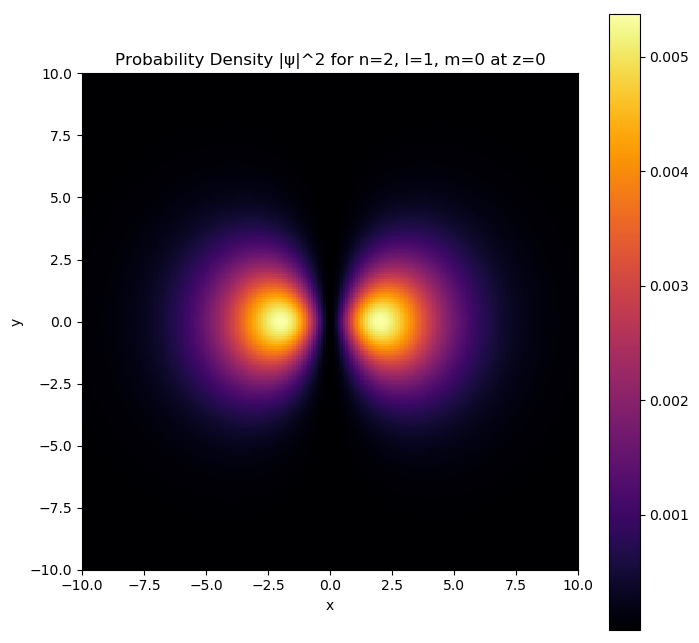

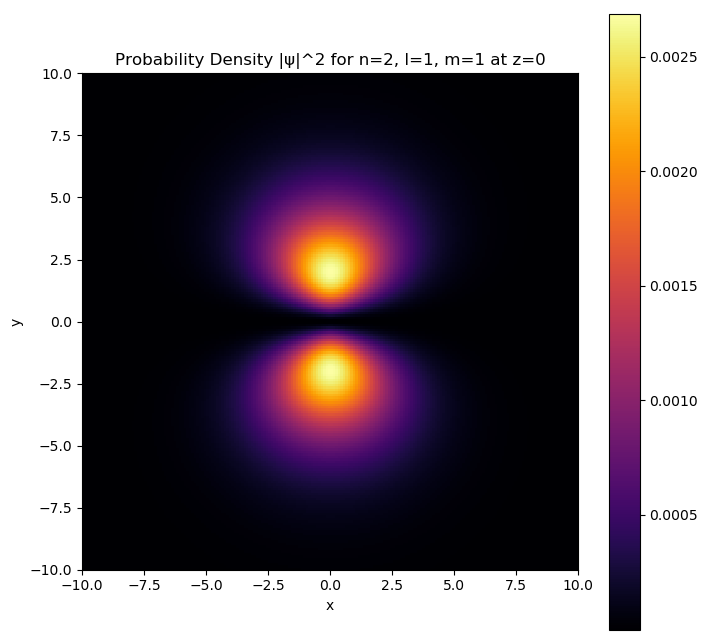

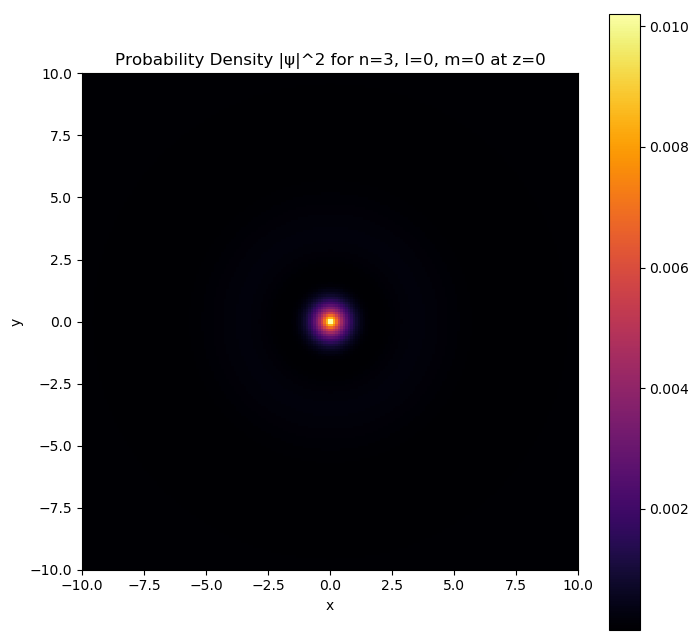

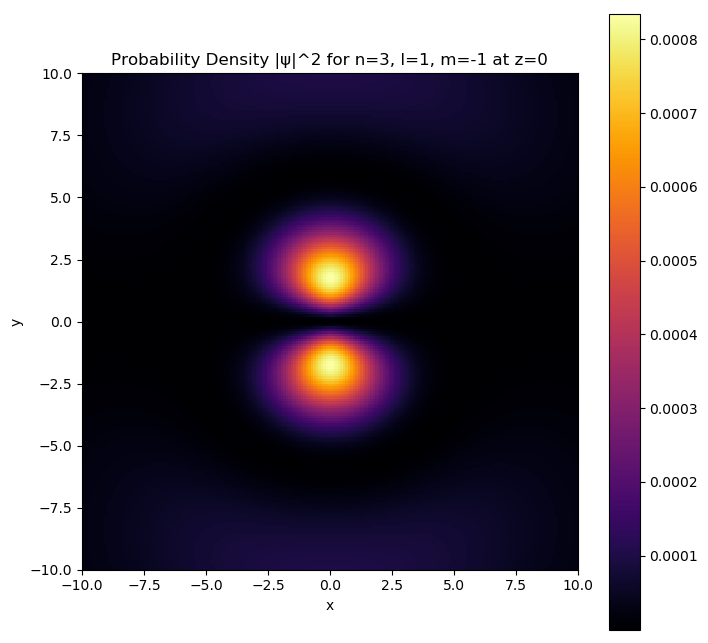

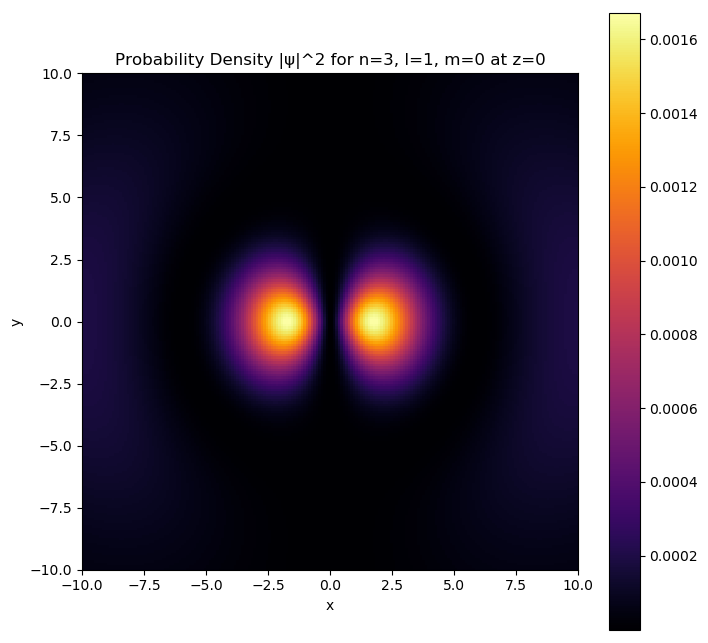

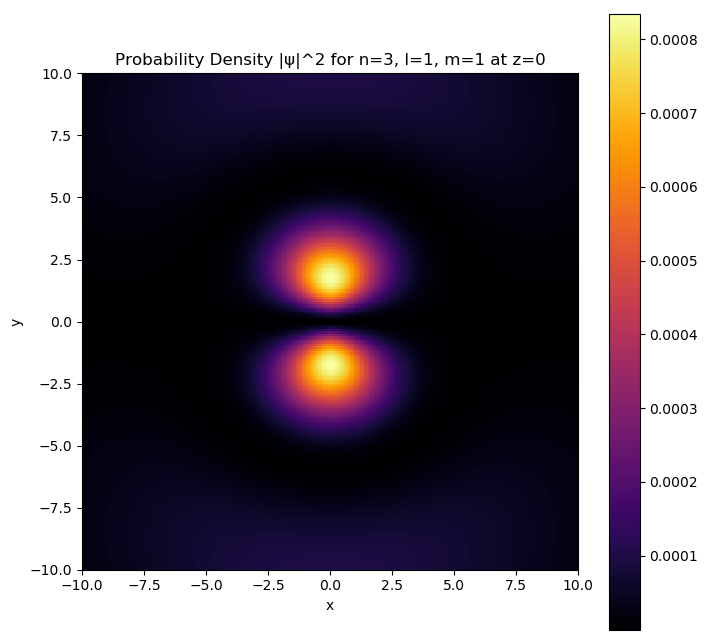

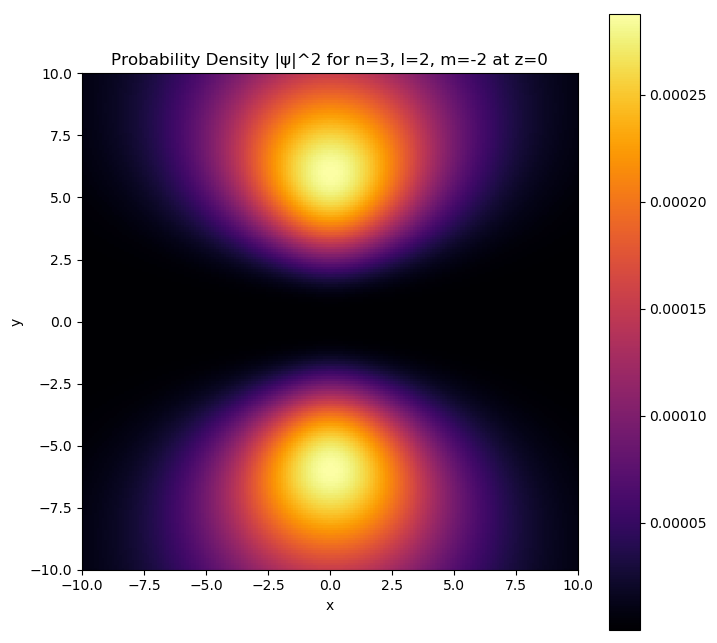

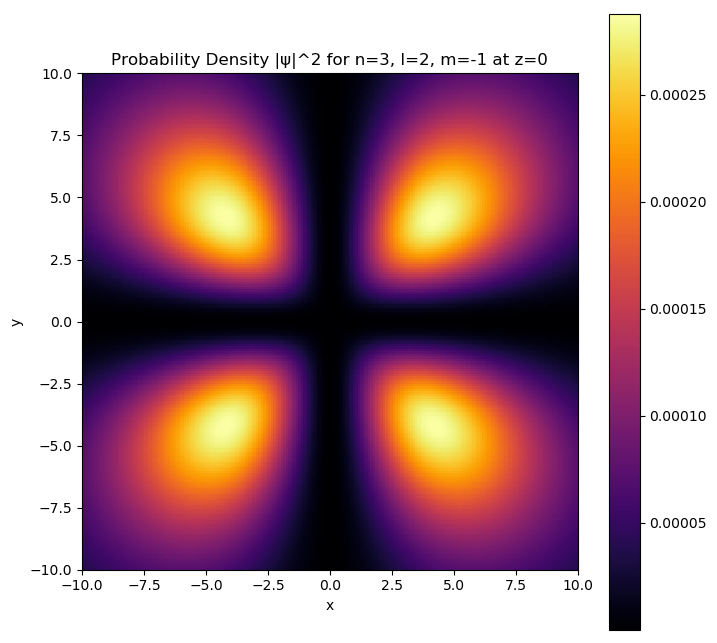

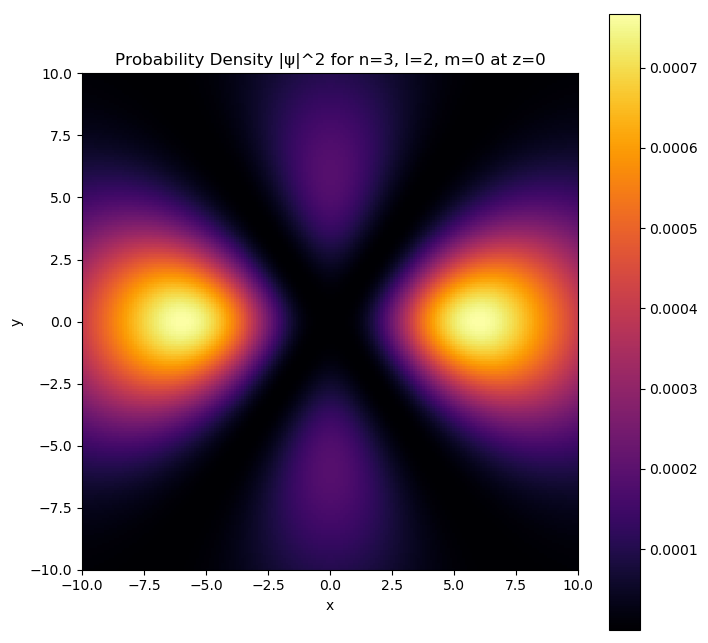

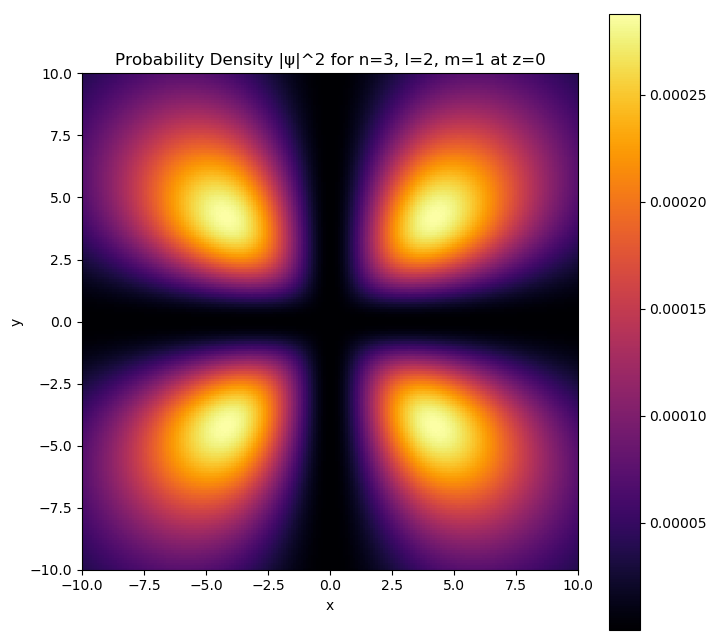

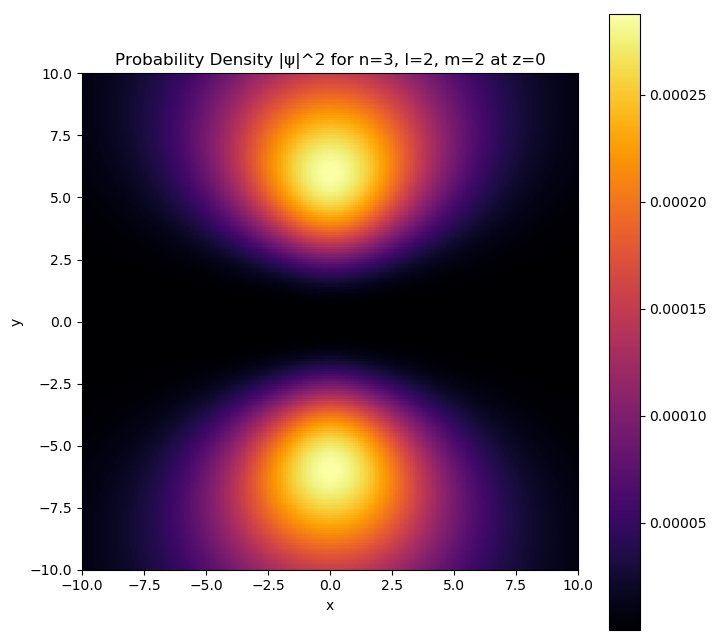

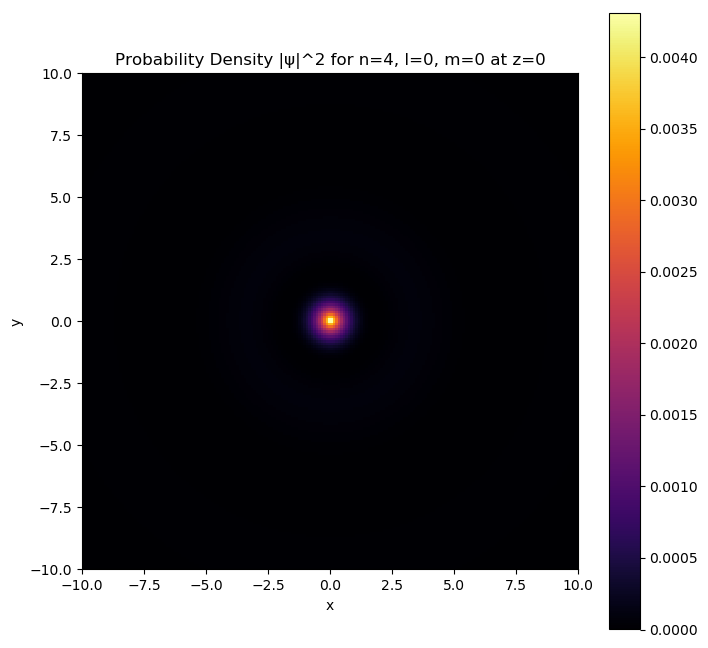

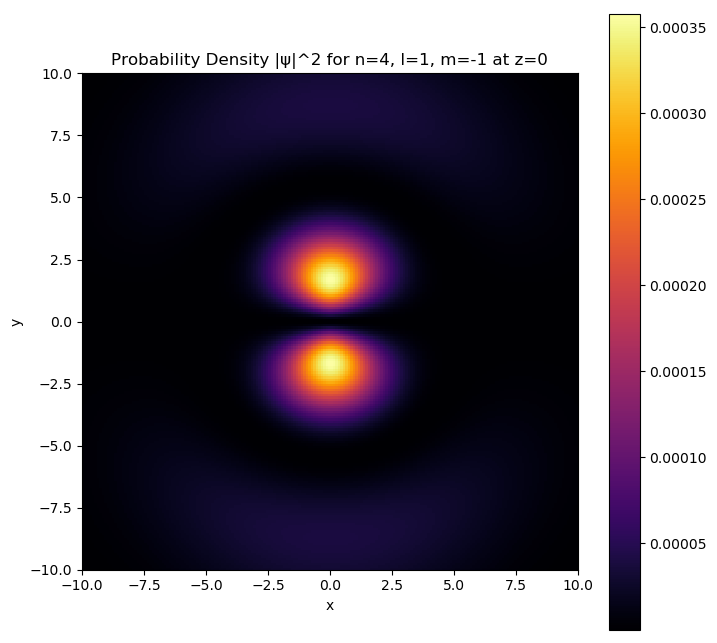

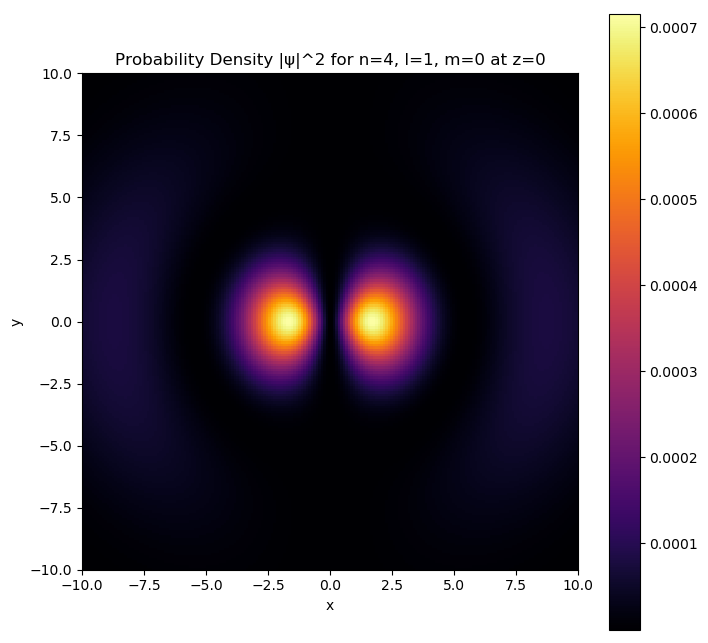

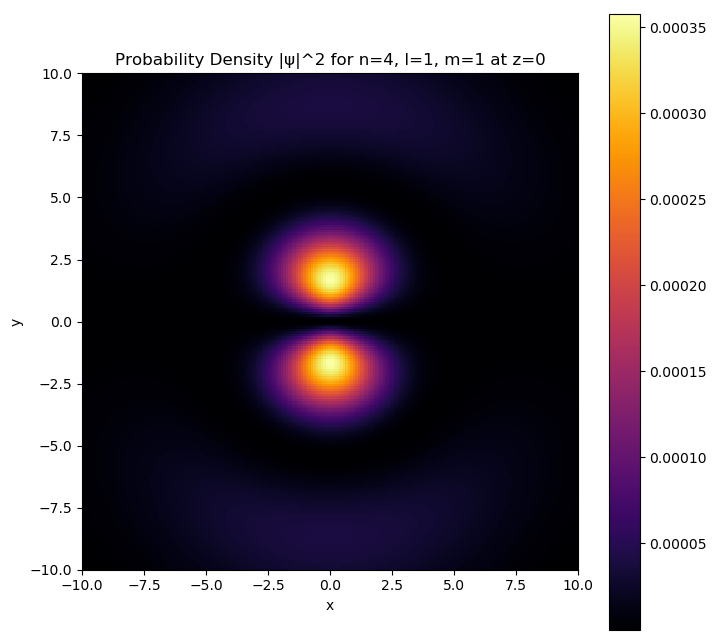

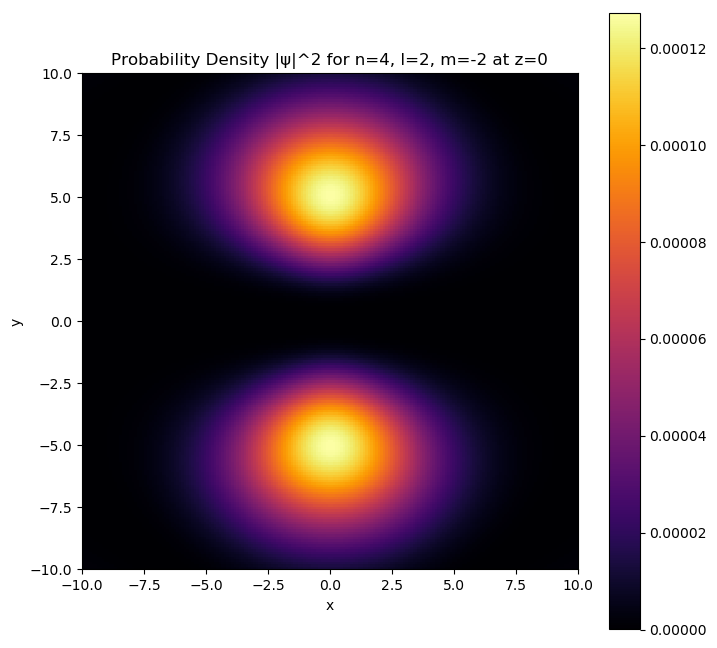

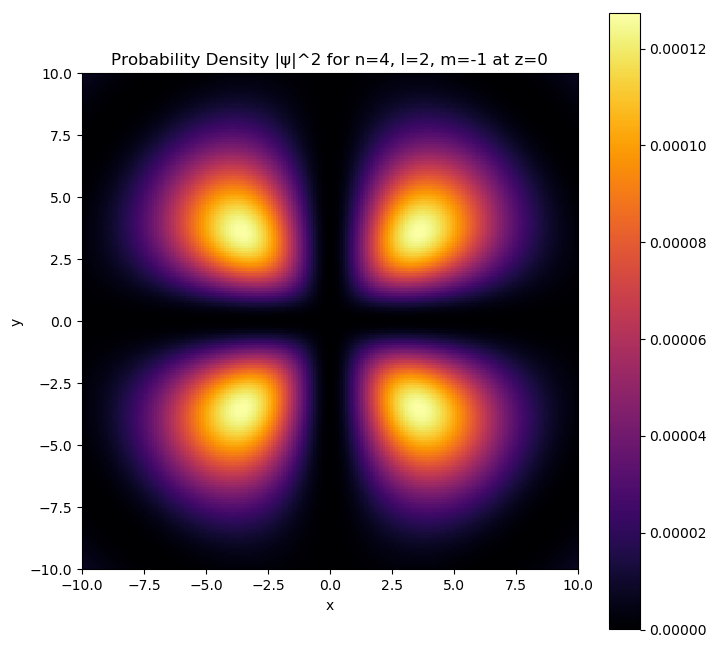

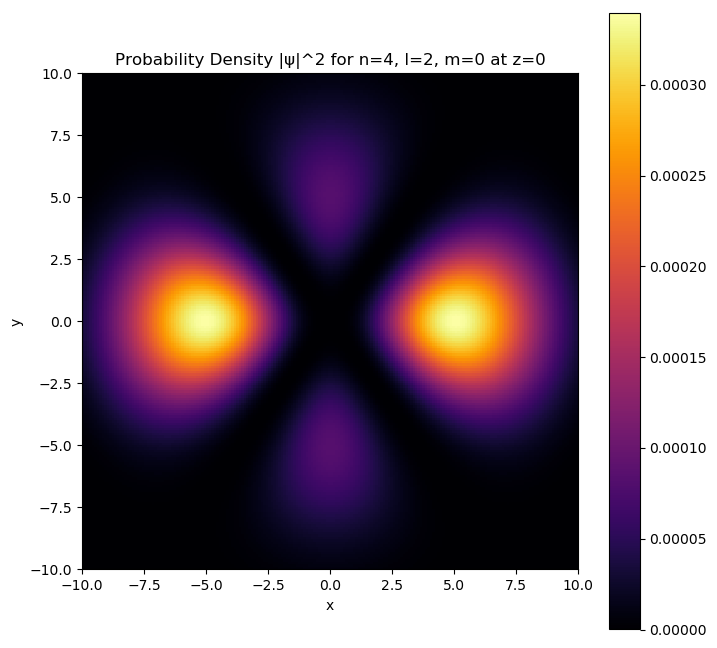

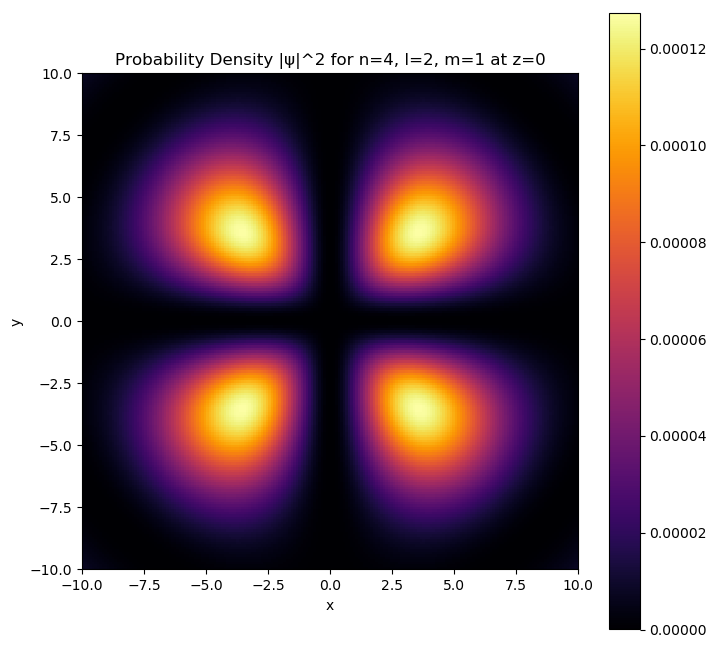

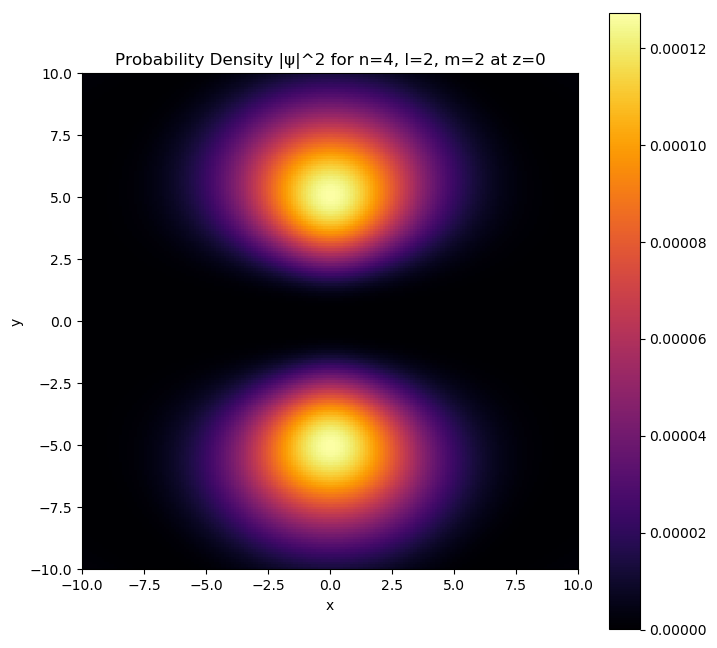

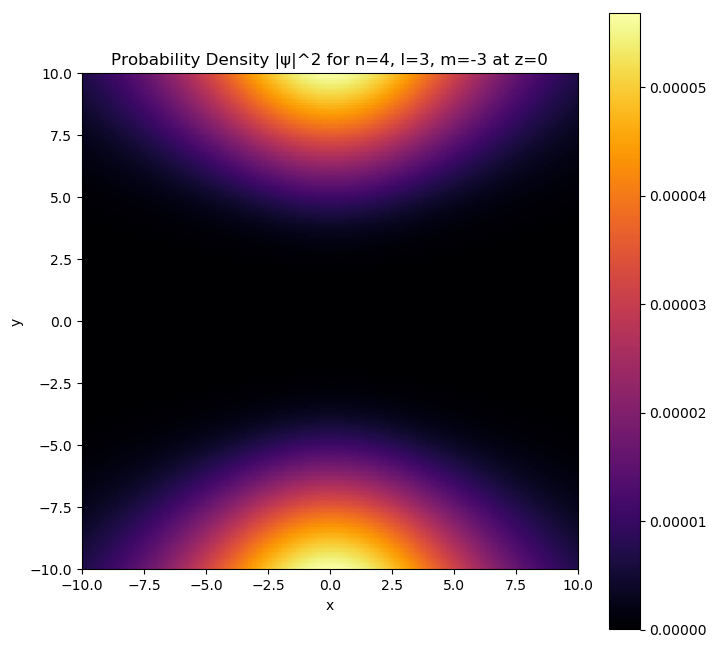

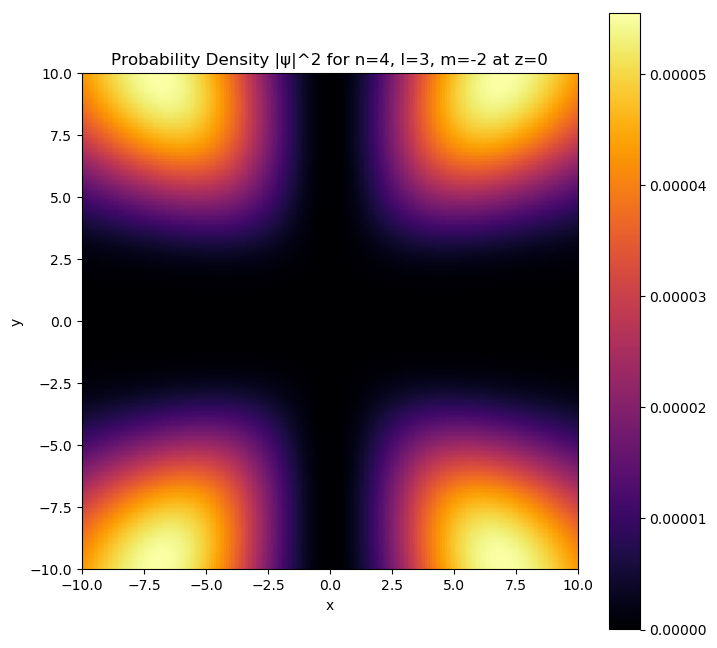

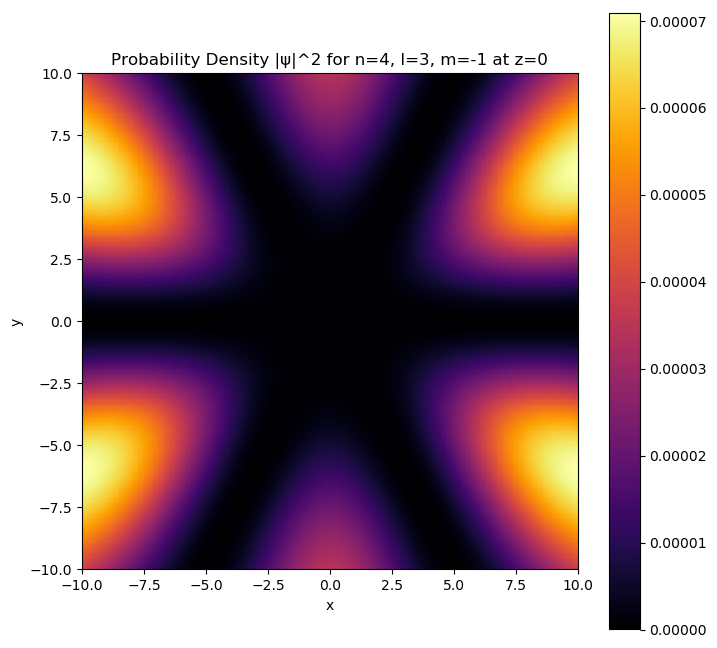

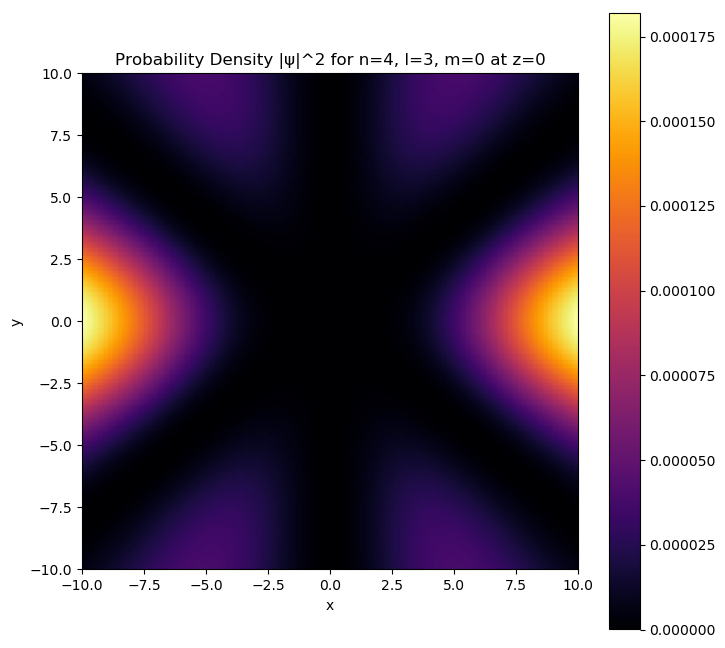

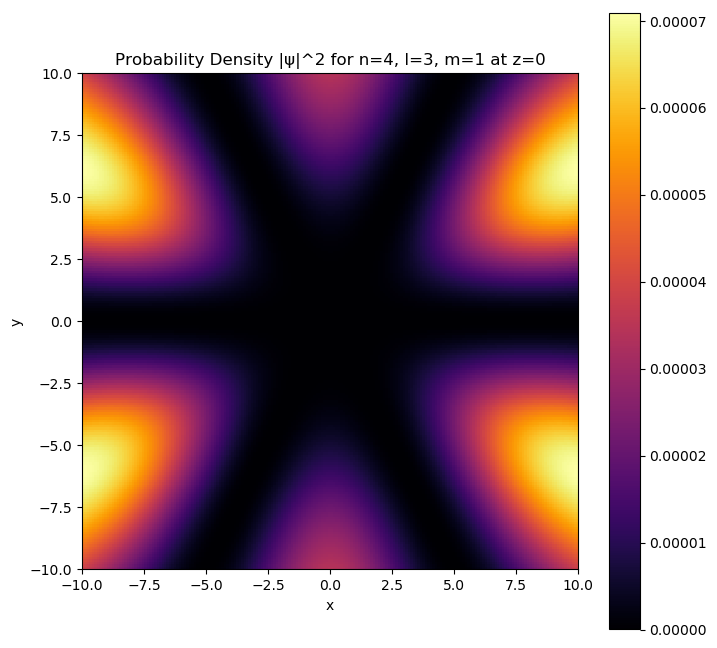

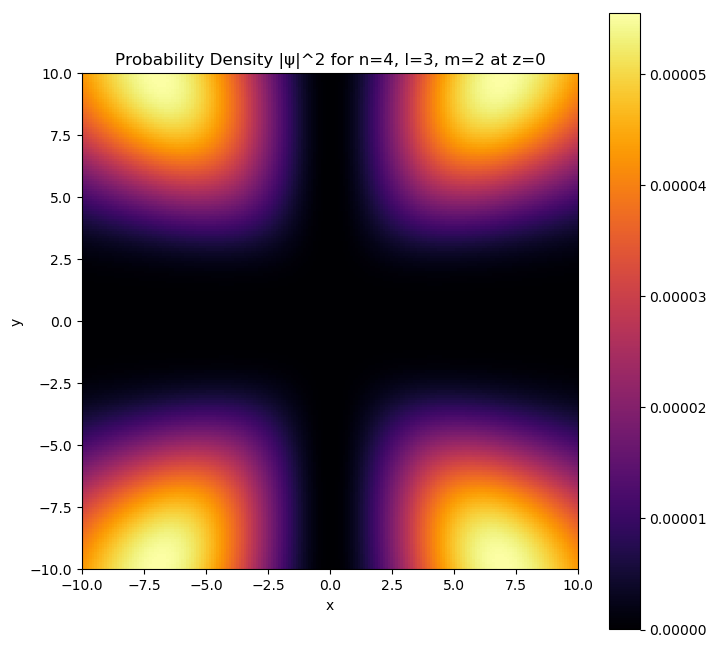

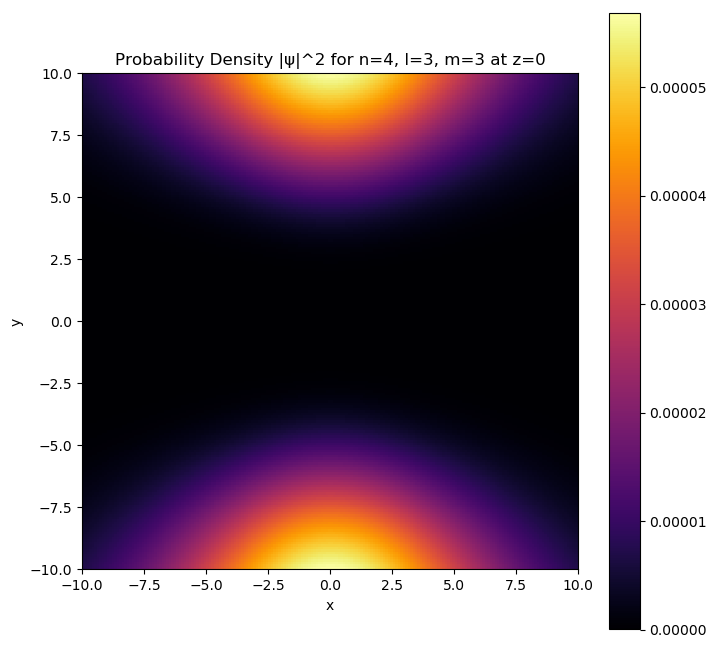

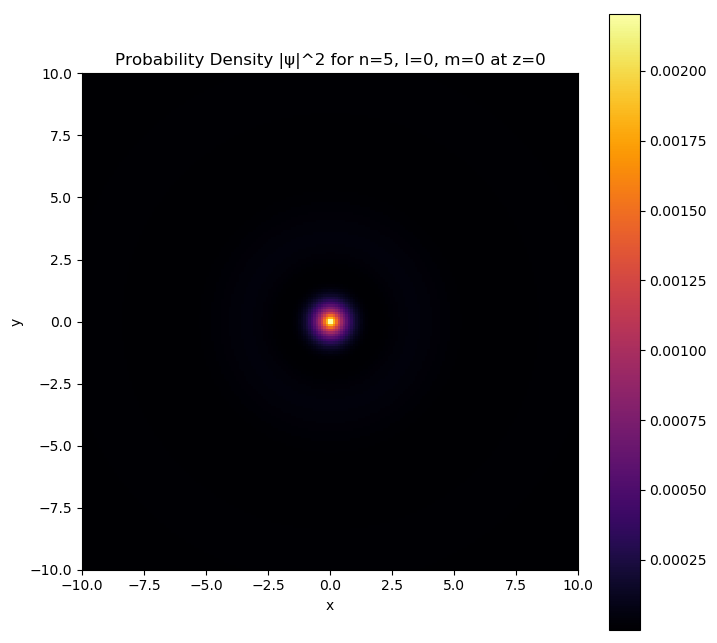

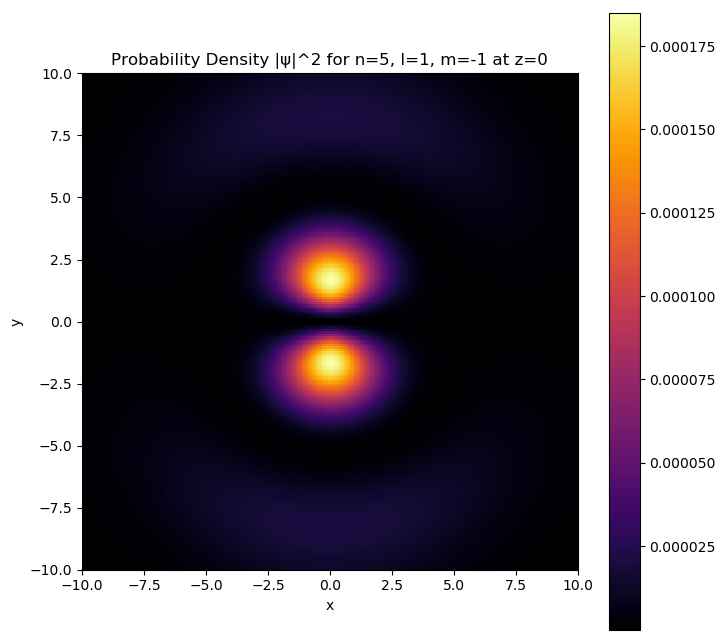

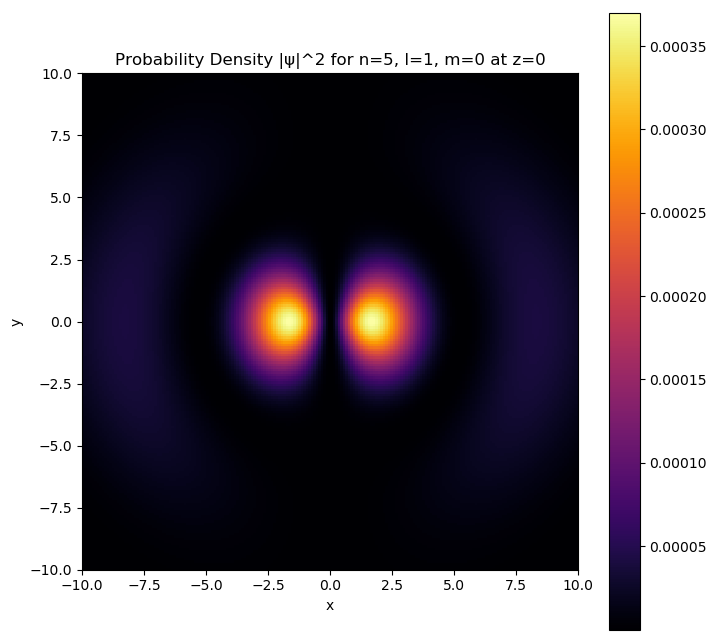

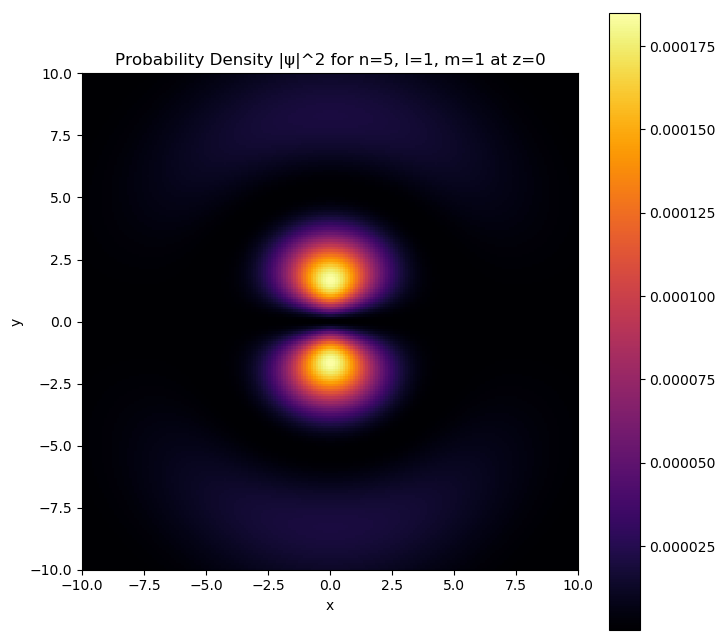

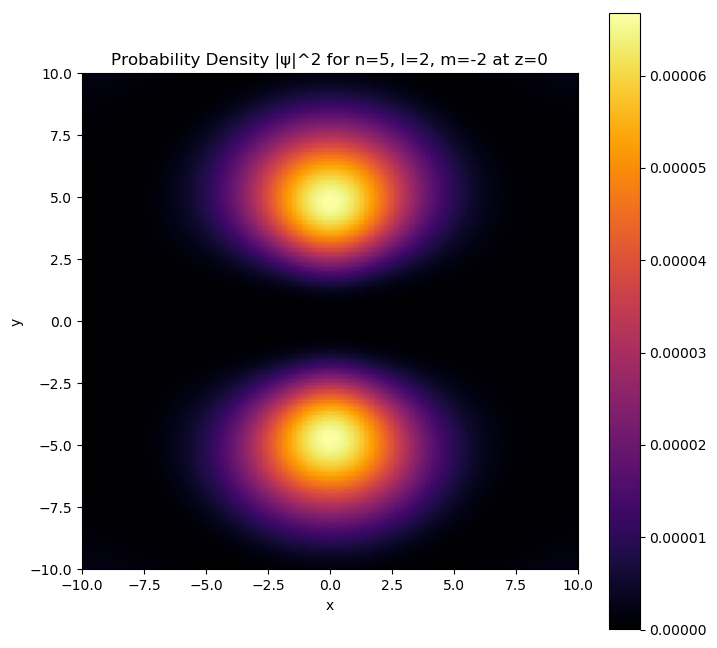

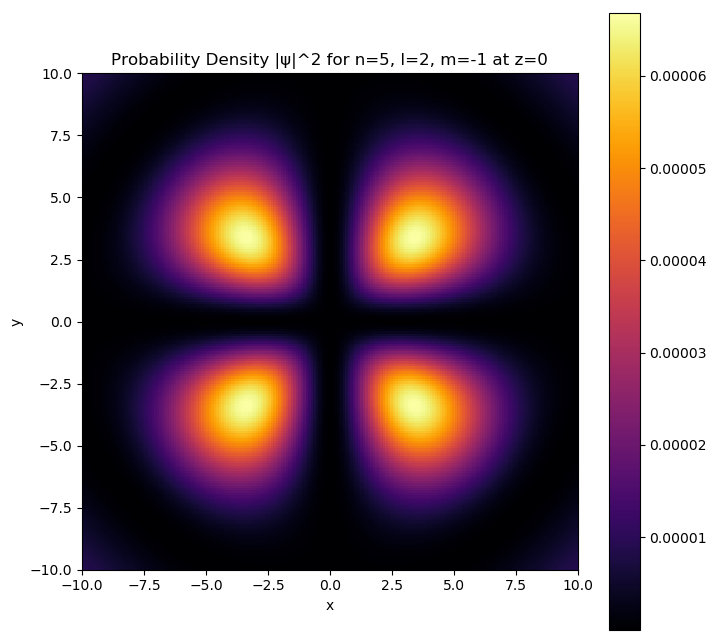

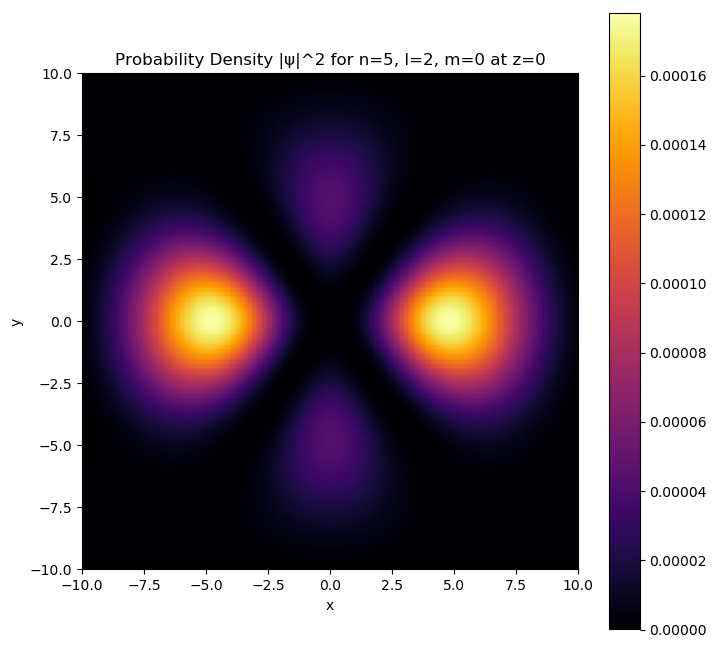

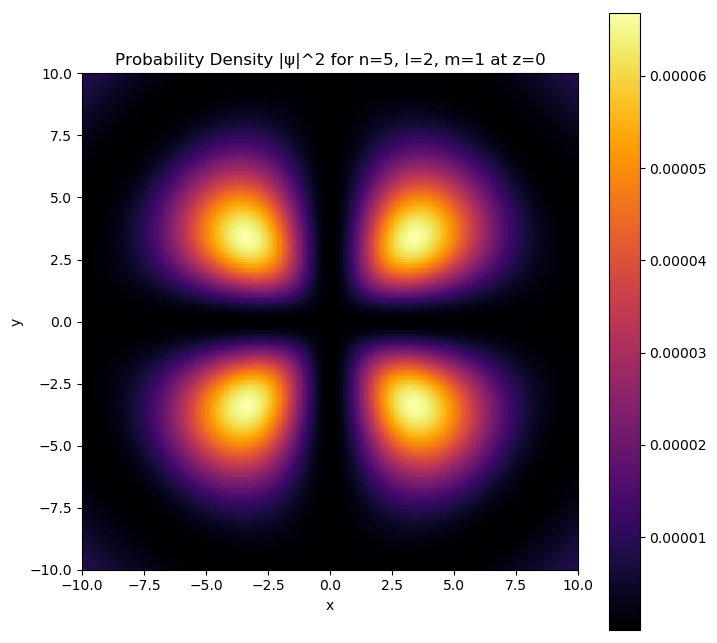

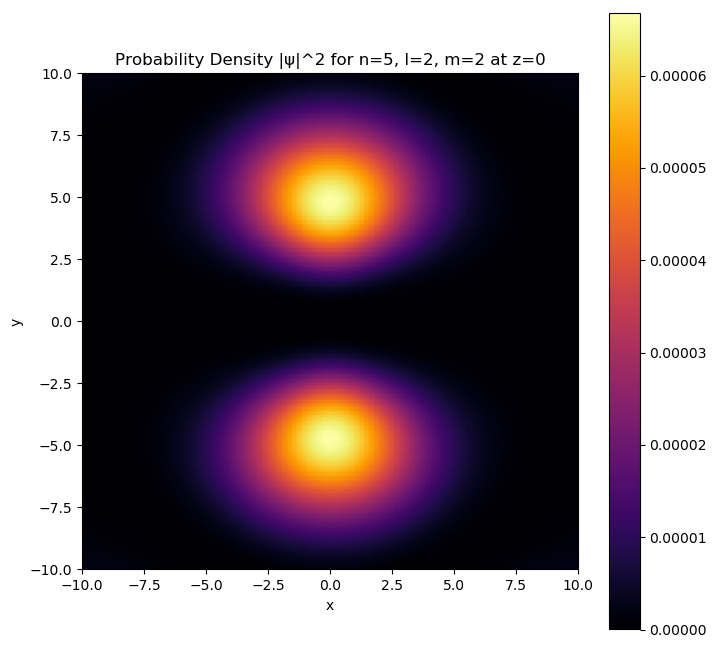

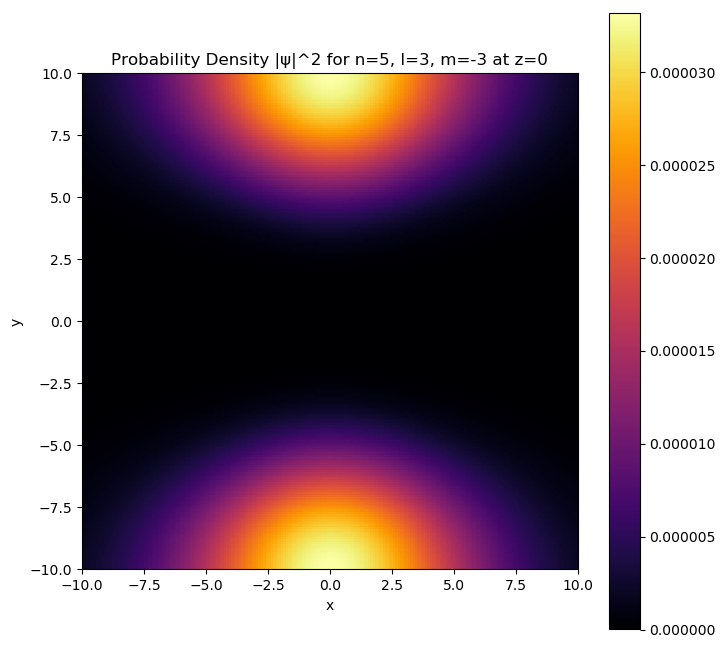

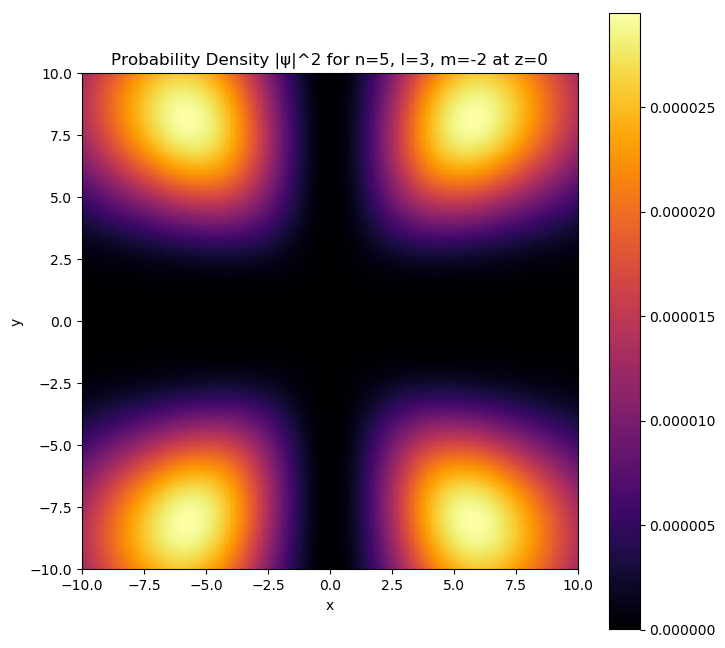

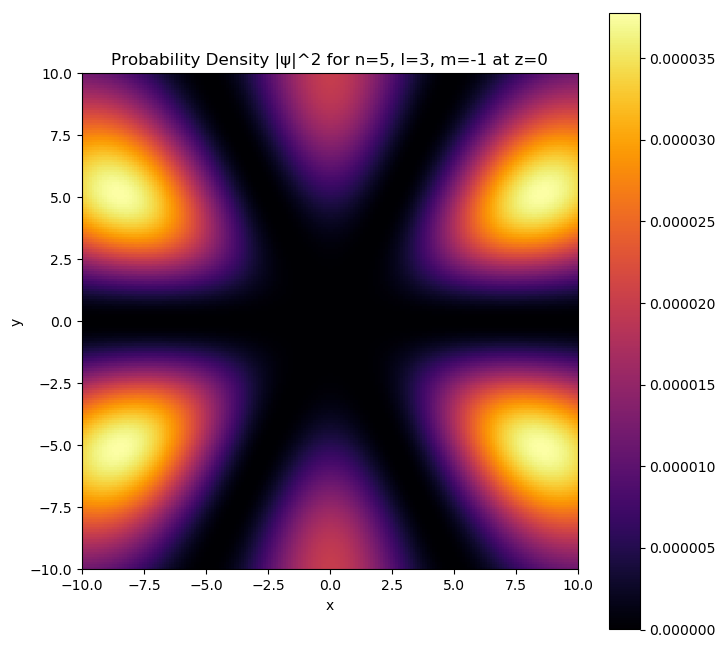

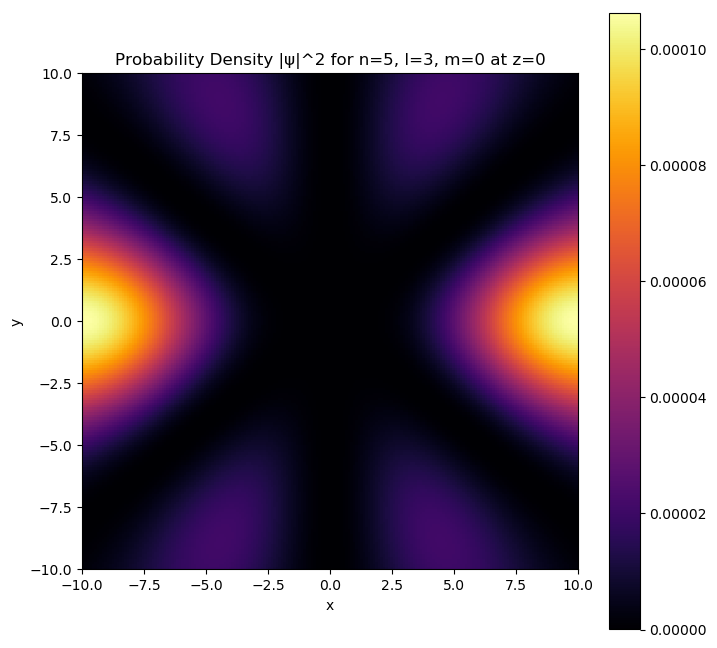

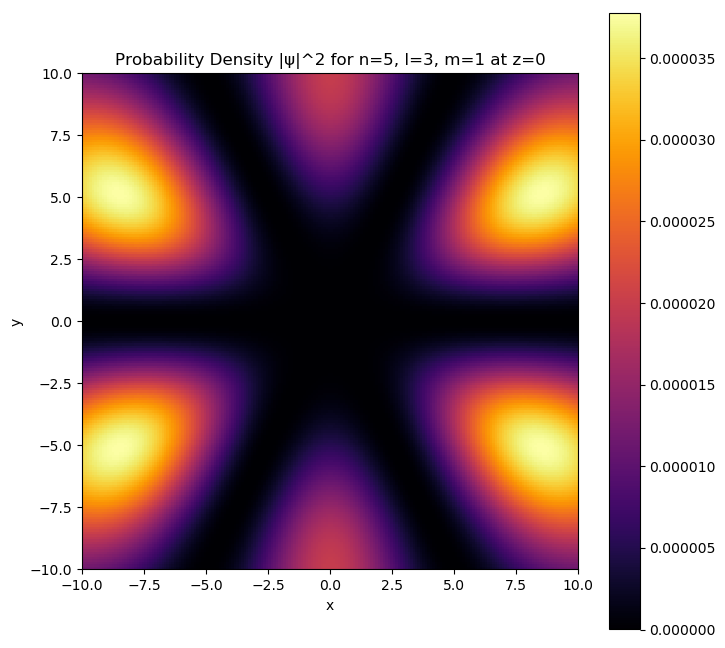

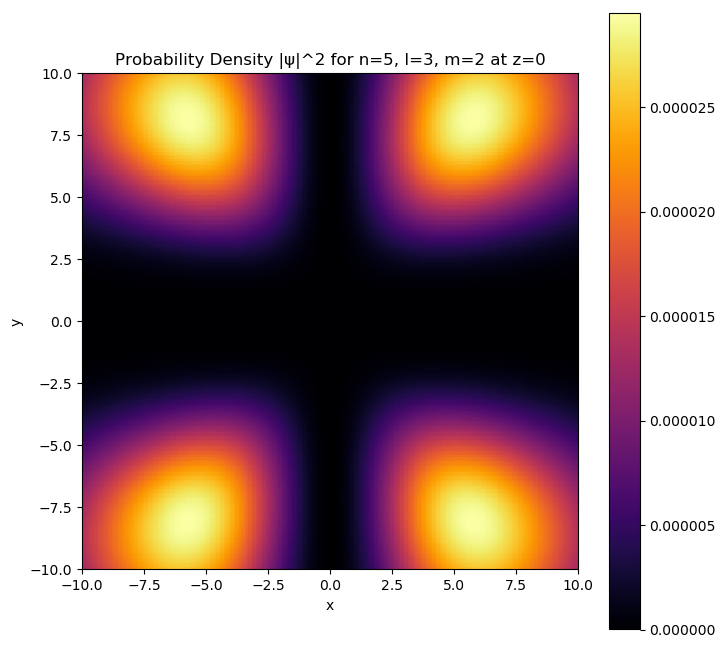

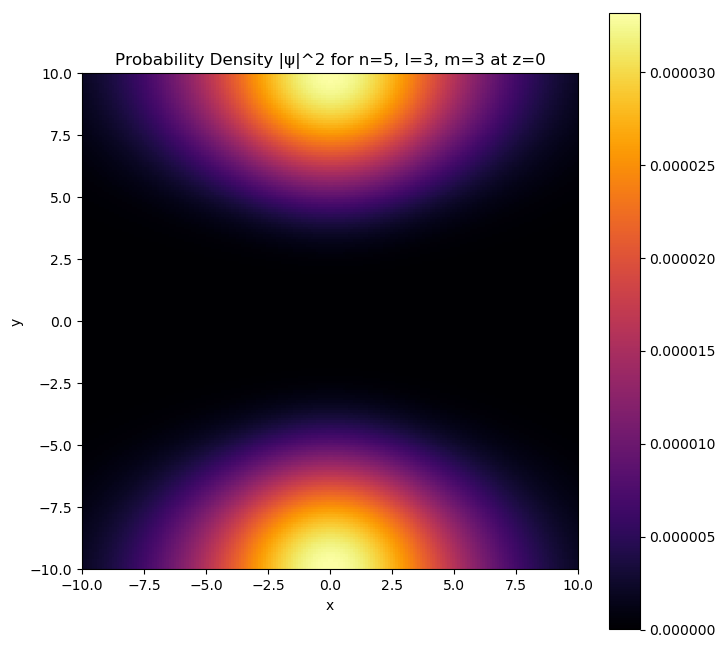

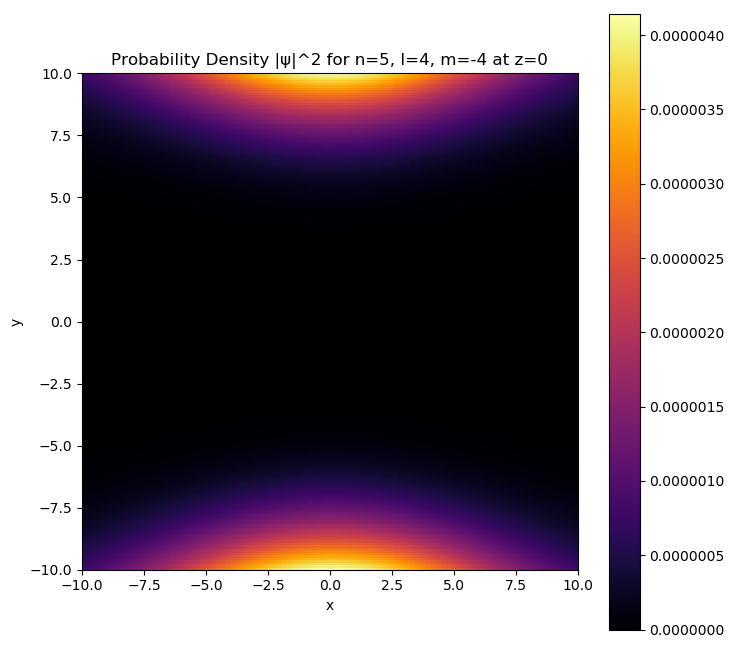

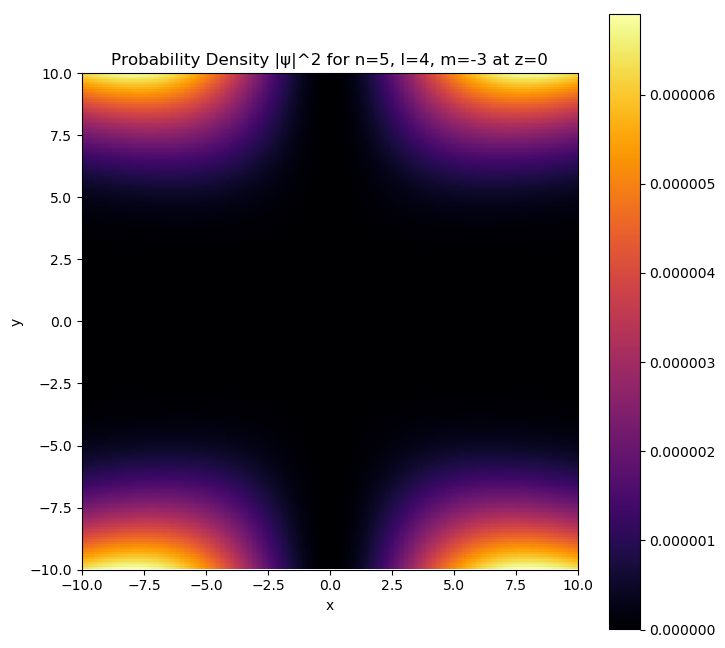

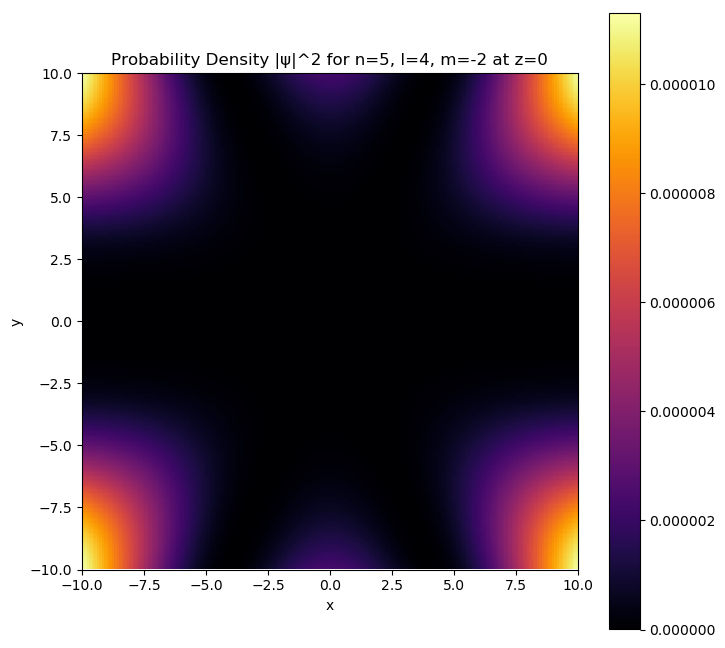

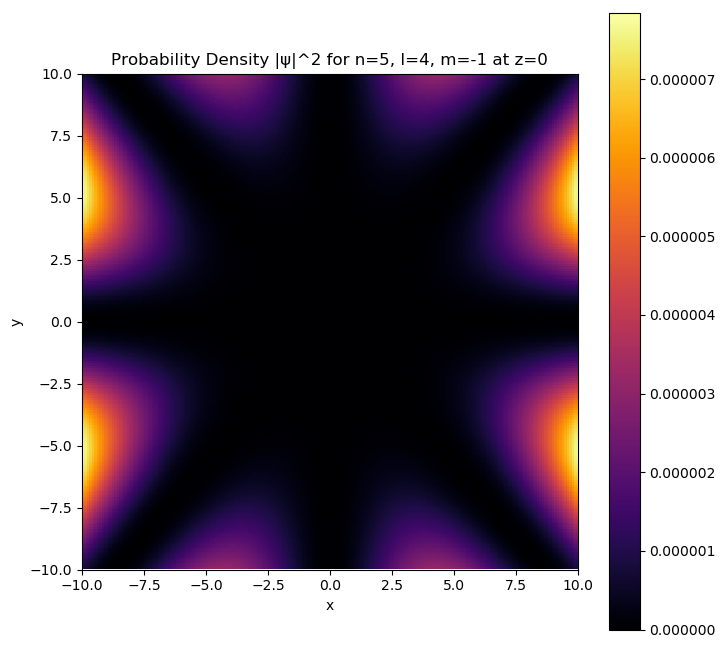

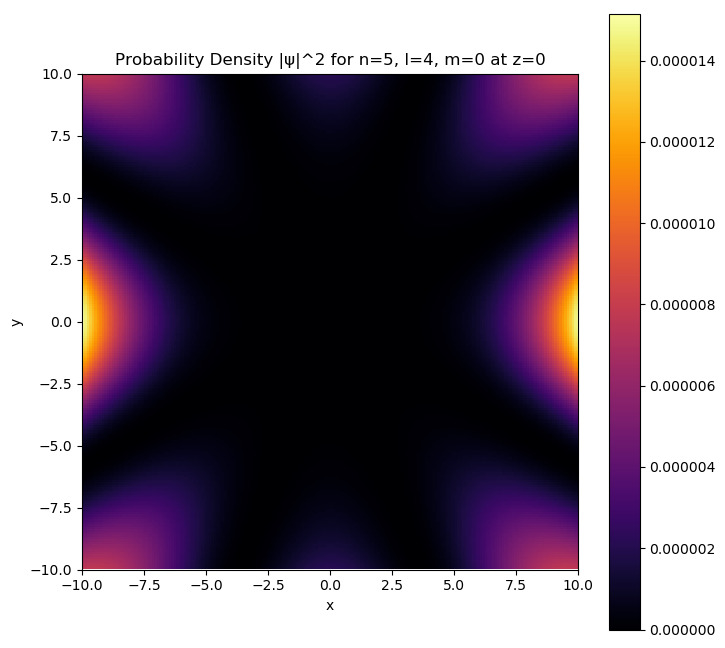

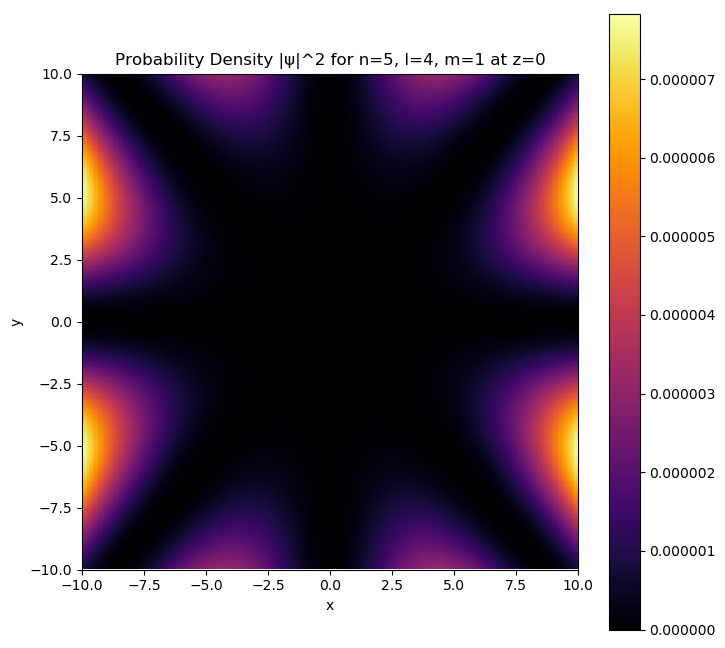

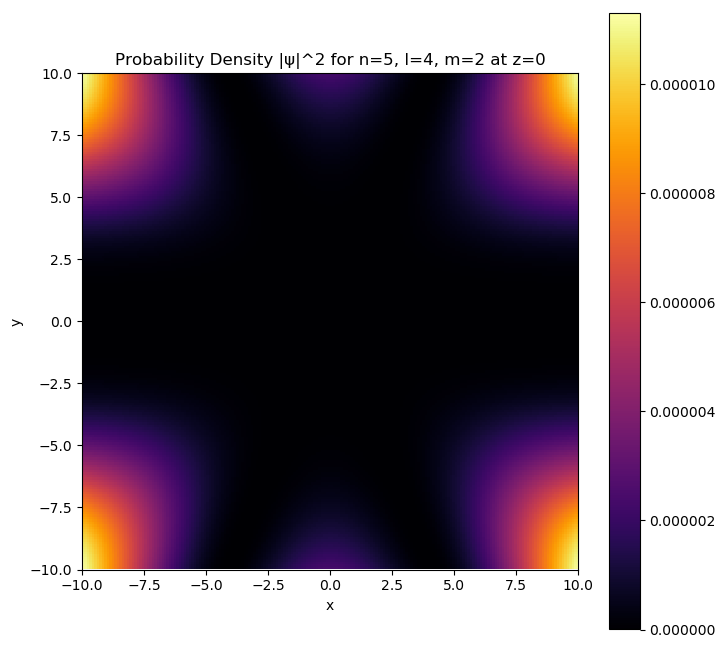

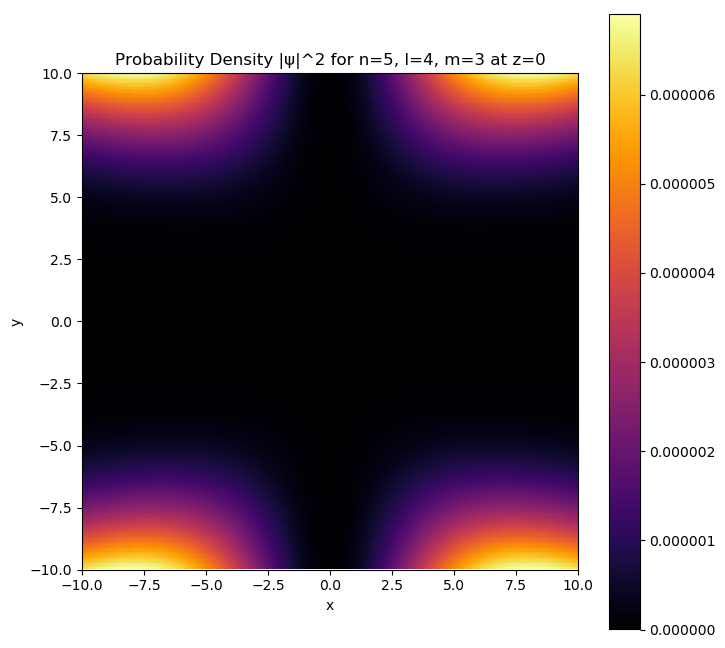

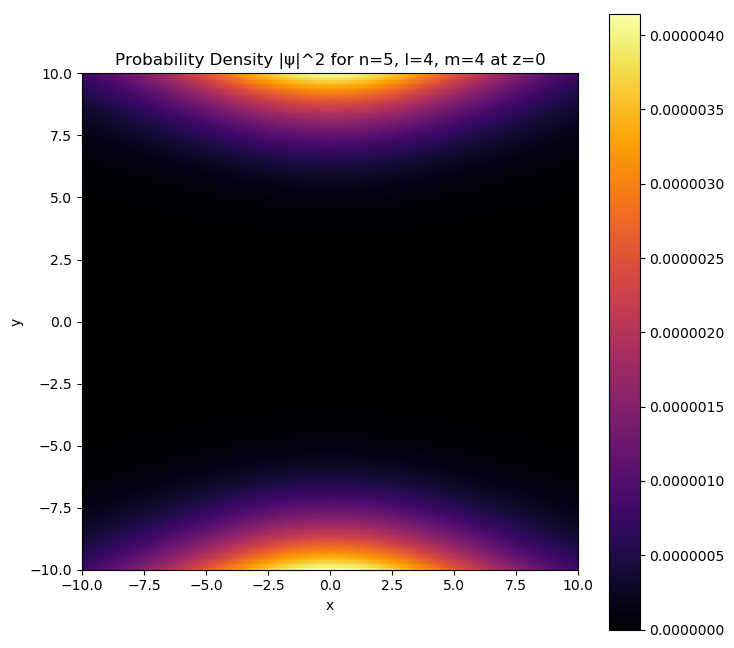

In [45]:
import numpy as np
import scipy.special as sp
from scipy.special import sph_harm
import matplotlib.pyplot as plt

# Define the function to evaluate the radial wavefunction
def eval_radial_wavefunction(n, l, r_values, a_0=1):
    rho_values = 2 * r_values / (n * a_0)
    k = n - l - 1
    # Evaluate the associated Laguerre polynomial
    L_values = sp.genlaguerre(k, 2 * l + 1)(rho_values)
    # Evaluate the full radial wavefunction
    R_values = np.sqrt((2 / (n * a_0))**3 * np.math.factorial(k) / (2 * n * np.math.factorial(k + 2 * l + 1))) * np.exp(-rho_values / 2) * rho_values**l * L_values
    return R_values

# Define the function to compute the angular part using spherical harmonics
def eval_angular_wavefunction(l, m, theta, phi):
    Y_lm_value = sph_harm(m, l, theta, phi)
    return Y_lm_value

# Define the function to compute the full wavefunction by combining the radial and angular parts
def compute_full_wavefunction(n, l, m, r, theta, phi, a_0=1):
    # Compute the radial part
    R_value = eval_radial_wavefunction(n, l, np.array([r]), a_0)[0]
    
    # Compute the angular part
    Y_lm_value = eval_angular_wavefunction(l, m, theta, phi)
    
    # Compute the full wavefunction
    psi_value = R_value * Y_lm_value
    return psi_value

# Define the function to compute the probability density from the wavefunction
def get_prob_density(psi_value):
    return np.abs(psi_value)**2

# Create a Cartesian grid for x and y at z = 0
x_values = np.linspace(-10, 10, 200)
y_values = np.linspace(-10, 10, 200)
x_grid, y_grid = np.meshgrid(x_values, y_values)

# Convert Cartesian coordinates to spherical coordinates
r_grid = np.sqrt(x_grid**2 + y_grid**2)
theta = np.pi / 2  # theta is pi/2 in the xy plane
phi_grid = np.arctan2(y_grid, x_grid)

# Function to compute and plot the probability density for a given state
def plot_probability_density(n, l, m):
    # Compute the probability density for each point on the grid
    prob_density_grid = np.zeros_like(x_grid, dtype=float)
    for i in range(x_grid.shape[0]):
        for j in range(x_grid.shape[1]):
            r = r_grid[i, j]
            phi = phi_grid[i, j]
            psi_value = compute_full_wavefunction(n, l, m, r, theta, phi)
            prob_density_grid[i, j] = get_prob_density(psi_value)
    
    # Plot the probability density using imshow
    fig, ax = plt.subplots(figsize=(8, 8))
    im = ax.imshow(prob_density_grid, extent=(x_values.min(), x_values.max(), y_values.min(), y_values.max()), origin='lower', cmap='inferno')
    plt.colorbar(im)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Probability Density |ψ|^2 for n={n}, l={l}, m={m} at z=0')
    plt.show()

# Generate plots for all selections of n, l, m for n = 1, 2, 3, 4, 5
for n in range(1, 6):
    for l in range(n):
        for m in range(-l, l + 1):
            plot_probability_density(n, l, m)
